# Student Attitude and Behavior Analysis
This data set has data that highlihgts high school and college students' attitude and behavior. We will analyze the different factors that affect how stressed a student feels, how well they do in school, and how well they are projected to succeed financially upon graduating college.

Missing values:
 Certification Course                                    0
Gender                                                  0
Department                                              0
Height(CM)                                              0
Weight(KG)                                              0
10th Mark                                               0
12th Mark                                               0
college mark                                            0
hobbies                                                 0
daily studing time                                      0
prefer to study in                                      0
salary expectation                                      0
Do you like your degree?                                0
willingness to pursue a career based on their degree    0
social medai & video                                    0
Travelling Time                                         0
Stress Level                                           

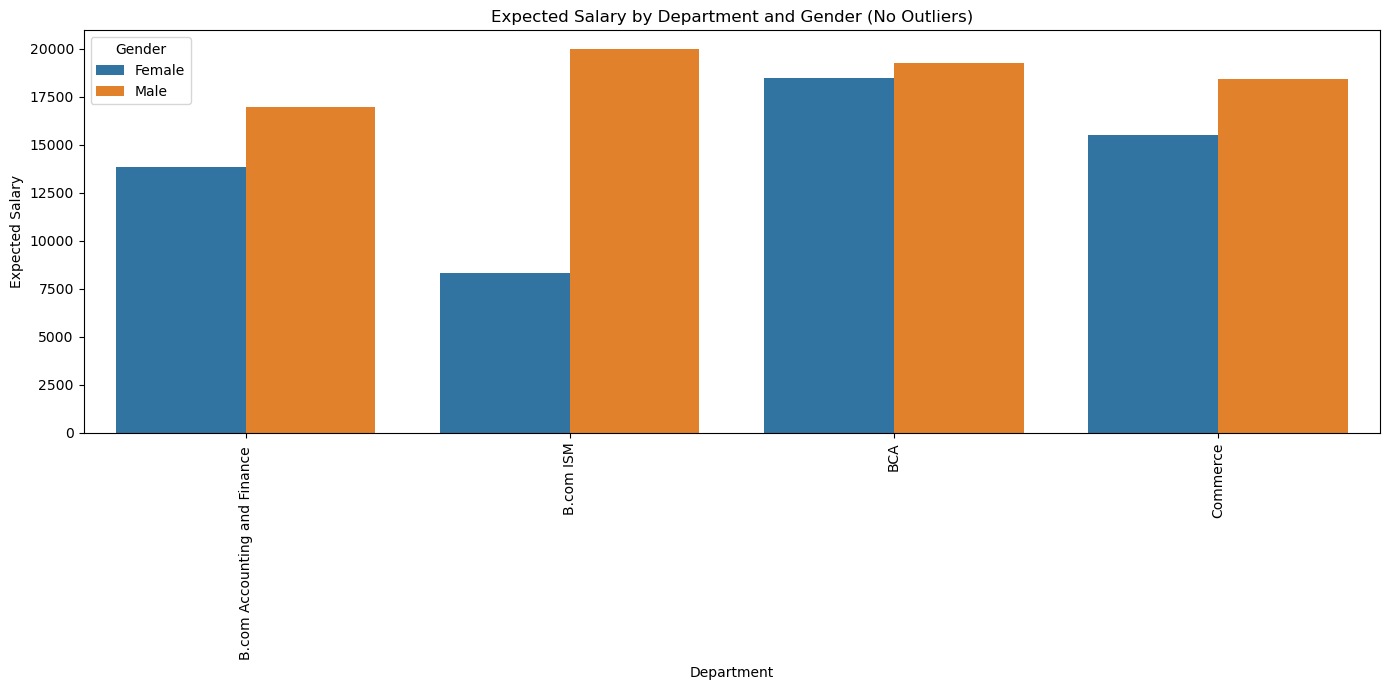

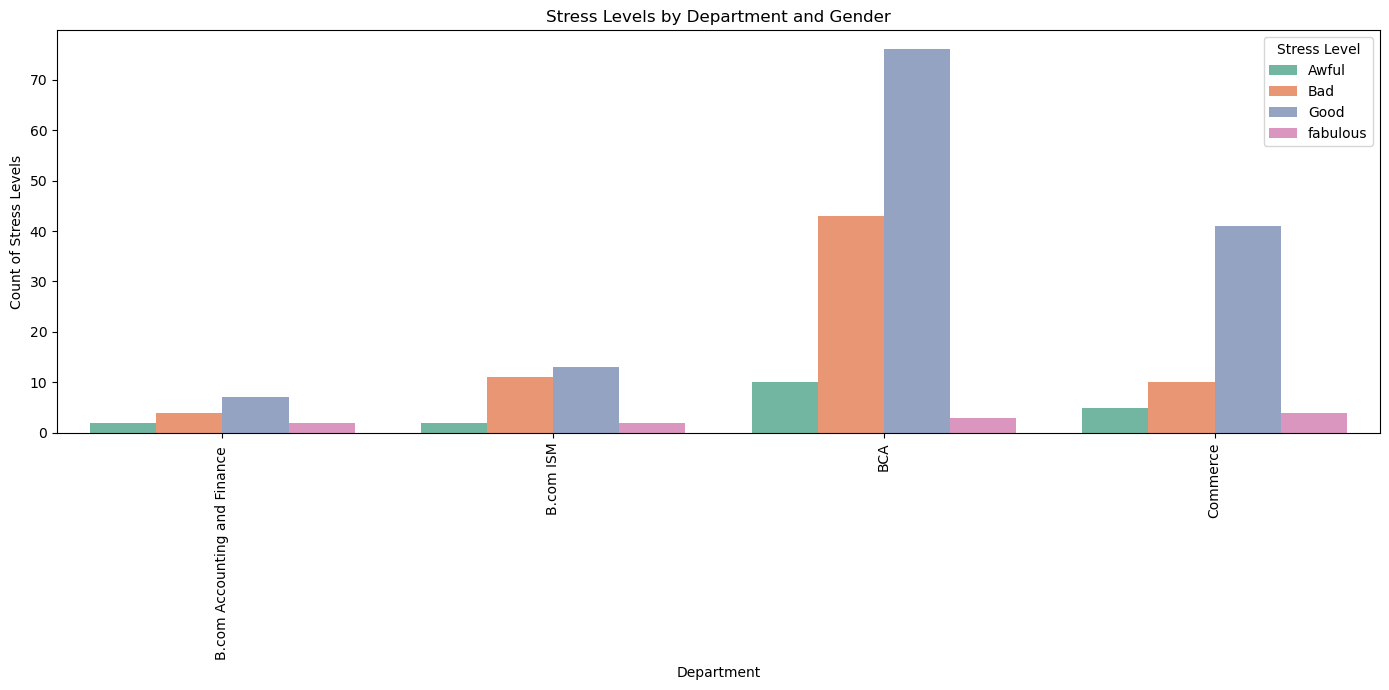

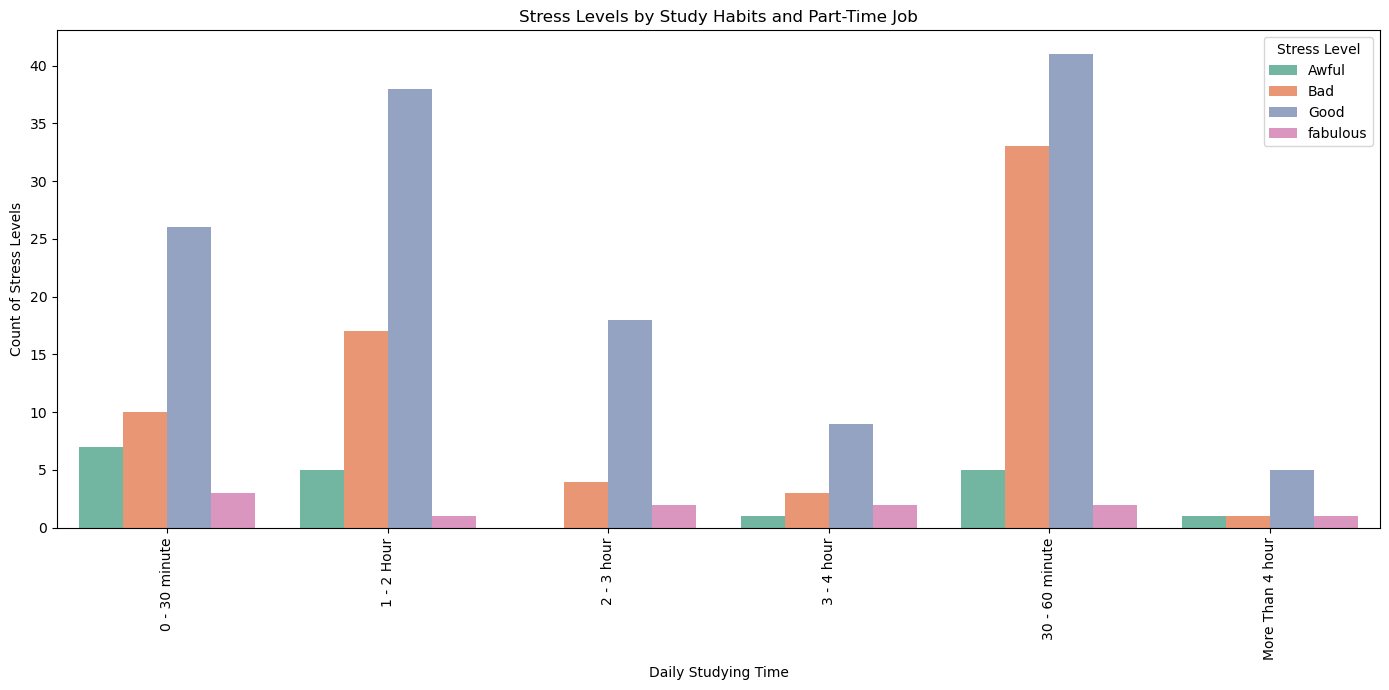

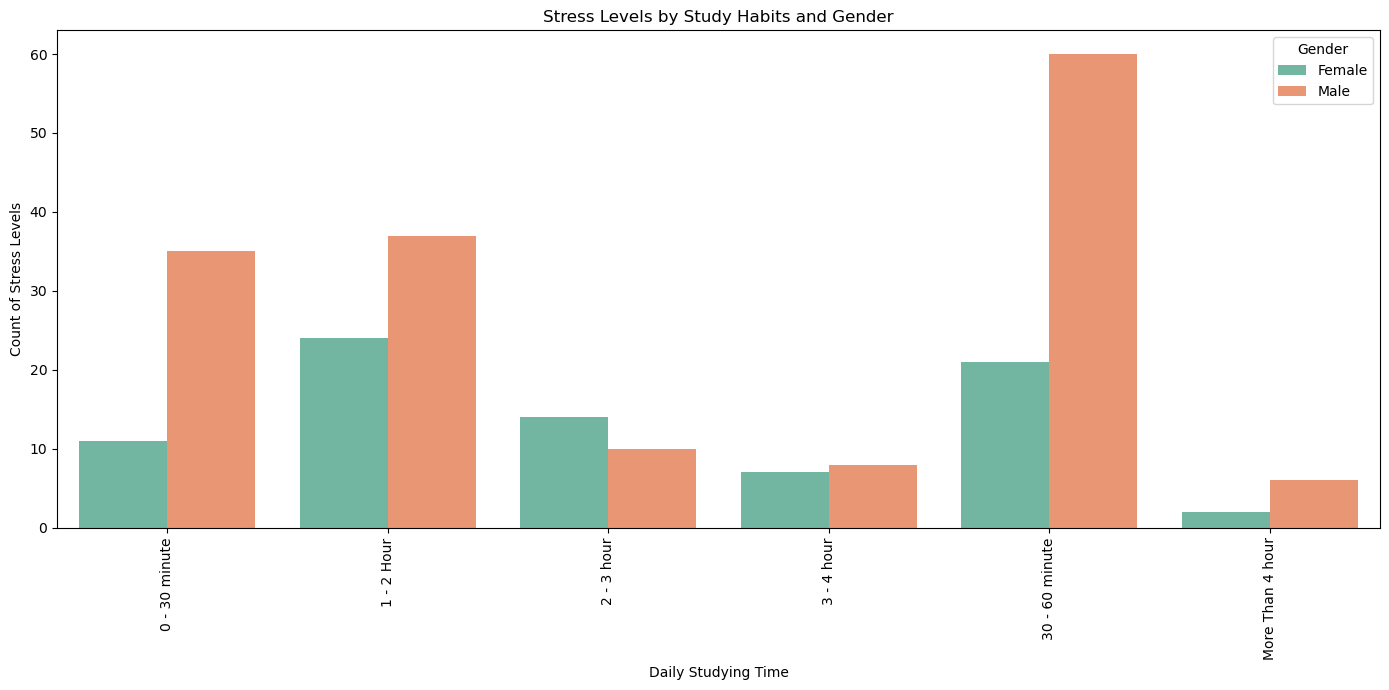

In [24]:
import pandas as pd
import os
csv_file_path = os.path.join(r"C:\Users\Kevin\OneDrive\Desktop\Coding Projects\Student Attitude and Behavior Project\Data", 'Student Attitude and Behavior.csv')
data = pd.read_csv(csv_file_path)


# Data Cleaning and Preprocessing
data.columns = data.columns.str.strip()

missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

categorical_columns = [
    'Certification Course', 'Gender', 'Department', 'hobbies', 'daily studing time',
    'prefer to study in', 'Do you like your degree?', 'willingness to pursue a career based on their degree',
    'social medai & video', 'Travelling Time', 'Stress Level', 'Financial Status', 'part-time job'
]

data[categorical_columns] = data[categorical_columns].astype('category')

# Convert percentage strings to numerical values
data['willingness to pursue a career based on their degree'] = data['willingness to pursue a career based on their degree'].str.rstrip('%').astype('float') / 100.0

# Handle any remaining missing values by filling with the mean for numerical columns and mode for categorical columns
numerical_columns = ['Height(CM)', 'Weight(KG)', '10th Mark', '12th Mark', 'college mark', 'salary expectation']
data = data.fillna({
    col: data[col].mean() for col in numerical_columns
}).fillna({
    col: data[col].mode()[0] for col in categorical_columns
})

# Calculate basic statistics for numerical columns
summary_statistics = data.describe()
print("Summary statistics:\n", summary_statistics)

import matplotlib.pyplot as plt
import seaborn as sns

data['salary expectation'] = pd.to_numeric(data['salary expectation'], errors='coerce')

data_no_outliers = remove_outliers(data, ['salary expectation'])

# Plot 1: Department vs. Expected Salary by Gender (Bar Graph)
plt.figure(figsize=(14, 7))
sns.barplot(data=data_no_outliers, x='Department', y='salary expectation', hue='Gender', ci=None)
plt.title('Expected Salary by Department and Gender (No Outliers)')
plt.xticks(rotation=90)
plt.xlabel('Department')
plt.ylabel('Expected Salary')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Plot 2: Department vs. Stress Levels by Gender (Count)
plt.figure(figsize=(14, 7))
sns.countplot(data=data, x='Department', hue='Stress Level', palette='Set2')
plt.title('Stress Levels by Department and Gender')
plt.xticks(rotation=90)
plt.xlabel('Department')
plt.ylabel('Count of Stress Levels')
plt.legend(title='Stress Level')
plt.tight_layout()
plt.show()

# Plot 3: Study Habits and Part-Time Job vs. Stress Levels by Gender (Count)
plt.figure(figsize=(14, 7))
sns.countplot(data=data, x='daily studing time', hue='Stress Level', palette='Set2')
plt.title('Stress Levels by Study Habits and Part-Time Job')
plt.xticks(rotation=90)
plt.xlabel('Daily Studying Time')
plt.ylabel('Count of Stress Levels')
plt.legend(title='Stress Level')
plt.tight_layout()
plt.show()

# Plot 4: Study Habits and Part-Time Job vs. Stress Levels by Gender (Count)
plt.figure(figsize=(14, 7))
sns.countplot(data=data, x='daily studing time', hue='Gender', palette='Set2')
plt.title('Stress Levels by Study Habits and Gender')
plt.xticks(rotation=90)
plt.xlabel('Daily Studying Time')
plt.ylabel('Count of Stress Levels')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


# Conclusion
The analysis of the data reveals several key insights regarding expected salary and stress levels among students. When examining expected salary by department and gender, it is evident that male students generally have higher salary expectations than female students within the same departments, with significant differences in some fields. Stress levels vary considerably across departments, with no clear trend indicating that one gender experiences more stress than the other, suggesting that departmental factors might have a greater influence on stress levels. Furthermore, students who study for longer periods daily tend to report higher stress levels, and those who have part-time jobs experience even more stress. This indicates that balancing work and study significantly contributes to student stress. The patterns of stress levels related to daily studying time are similar for both male and female students, highlighting that the amount of time dedicated to studying is a critical factor influencing stress irrespective of gender.